In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
# DATA PREPARATION

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [ ]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
x_train = x_train.astype(float)
x_test = x_test.astype(float)

In [ ]:
import matplotlib.pyplot as plt

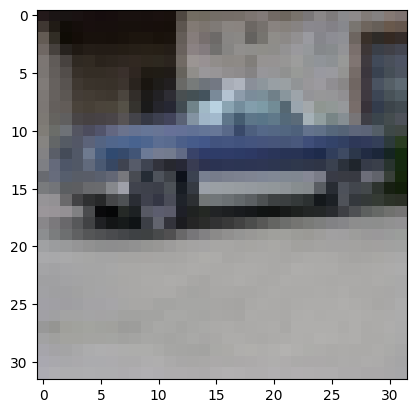

In [ ]:
plt.imshow(x_train[10000].astype(int))
plt.show()

In [ ]:
# MODEL BUILDING

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, Activation, Flatten
from tensorflow.keras.metrics import AUC

In [ ]:
model = Sequential()
model.add(Conv2D(filters=3, kernel_size=(5,5), strides=(1,1), padding='valid'))
model.add(Activation("relu"))
model.add(Conv2D(filters=3, kernel_size=(5,5), strides=(1,1), padding='valid'))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy", AUC(curve="PR")])

In [ ]:
model.fit(x=x_train,
          y=y_train_ohe,
          batch_size=1000,
          validation_data=(x_test, y_test_ohe),
          epochs=30)

Epoch 1/30
50/50 [==============================] - 53s 1s/step - loss: 7.2626 - accuracy: 0.0873 - auc_2: 0.1004 - val_loss: 2.4521 - val_accuracy: 0.0906 - val_auc_2: 0.0997
Epoch 2/30
50/50 [==============================] - 51s 1s/step - loss: 2.3931 - accuracy: 0.0941 - auc_2: 0.0994 - val_loss: 2.3461 - val_accuracy: 0.0939 - val_auc_2: 0.1002
Epoch 3/30
50/50 [==============================] - 50s 1s/step - loss: 2.3325 - accuracy: 0.0964 - auc_2: 0.0996 - val_loss: 2.3197 - val_accuracy: 0.0963 - val_auc_2: 0.0997
Epoch 4/30
50/50 [==============================] - 52s 1s/step - loss: 2.3161 - accuracy: 0.0994 - auc_2: 0.0999 - val_loss: 2.3126 - val_accuracy: 0.1013 - val_auc_2: 0.1011
Epoch 5/30
50/50 [==============================] - 51s 1s/step - loss: 2.3109 - accuracy: 0.1007 - auc_2: 0.1002 - val_loss: 2.3100 - val_accuracy: 0.1012 - val_auc_2: 0.1008
Epoch 6/30
50/50 [==============================] - 49s 991ms/step - loss: 2.3086 - accuracy: 0.0980 - auc_2: 0.0997 - v

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (1000, 28, 28, 3)         228       
                                                                 
 activation_4 (Activation)   (1000, 28, 28, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (1000, 24, 24, 3)         228       
                                                                 
 activation_5 (Activation)   (1000, 24, 24, 3)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (1000, 12, 12, 3)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (1000, 432)               0         
                                                      

In [ ]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_accuracy = model.history.history['accuracy']
validation_accuracy = model.history.history['val_accuracy']

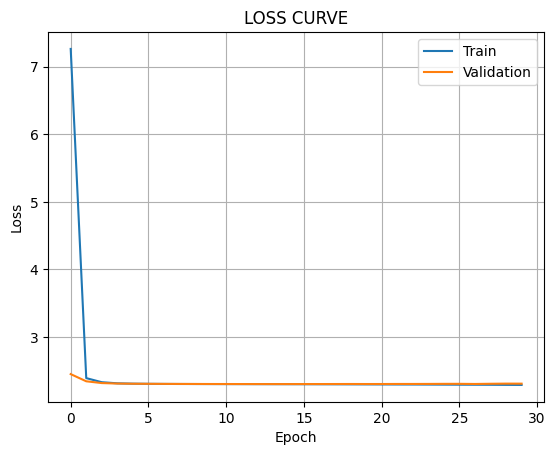

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("LOSS CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()

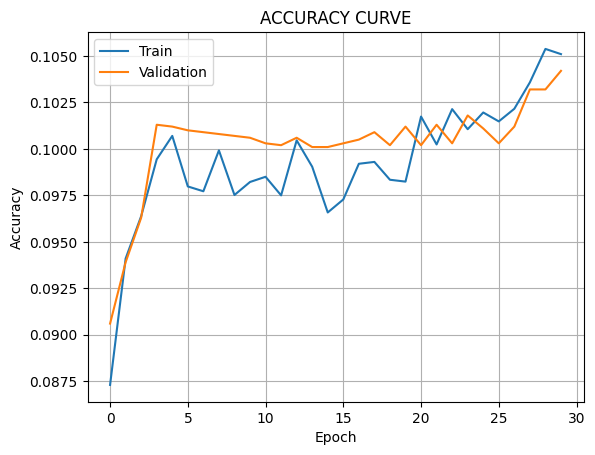

In [ ]:
plt.plot(train_accuracy)
plt.plot(validation_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("ACCURACY CURVE")
plt.legend(['Train', 'Validation'])
plt.grid()
plt.show()